In [1]:
from cdt.independence.graph import Glasso
import pickle
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy.linalg as la
from sklearn.covariance import EmpiricalCovariance, graphical_lasso, GraphicalLassoCV

Detecting 1 CUDA devices.


In [2]:
with open('data/data_fill.pkl','rb') as f:
    data_fill_list = pickle.load(f)

    

In [3]:
emp = EmpiricalCovariance()
lambdas_lst = []
MRFs_list = []
gl = Glasso()
for data_fill in tqdm_notebook(data_fill_list):
    emp.fit(data_fill)
    cov = emp.covariance_
    gcv = GraphicalLassoCV(cv = 5, alphas = 20)
    gcv.fit(data_fill.values)
    ind_best = gcv.grid_scores_.mean(1).argmax()
    lambda_best = gcv.cv_alphas_[ind_best]
    lambdas_lst.append(lambda_best)
    graph = gl.predict(data_fill, alpha = lambda_best)
    mat = nx.adjacency_matrix(graph).todense()
    MRFs_list.append(mat)
    

Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
invalid value encountered in multiply
invalid value encountered in multiply
graphical_lasso: did not converge after 100 iteration: dual gap: -3.493e-04
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
graphical_lasso: did not converge after 2000 iteration: dual gap: -3.808e-04
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
invalid value encountered in multiply
invalid value encountered in multiply
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to '

Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.


In [4]:
lambdas_lst

[0.00031177459992035315,
 0.0003120027677594686,
 0.00036466934789028237,
 0.0003009922999970166,
 0.0004042770624633552,
 0.00027469305997067584,
 0.00028424426095008214,
 0.00034015639325209515,
 0.0003404713451451764,
 0.00050495425665279]

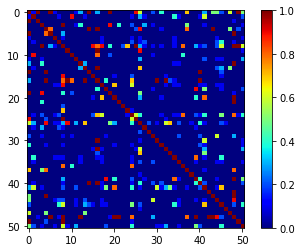

In [5]:
freqs = (np.array(MRFs_list)>0).mean(0)
plt.imshow(freqs,cmap='jet')
plt.colorbar()

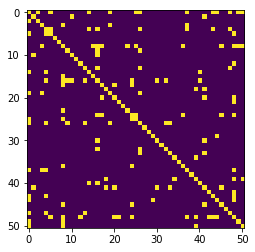

In [6]:
mrf_tot = (freqs>=.5).astype(int)
plt.imshow(mrf_tot)

In [7]:
#Check out off diagonal ones
ones = np.argwhere(mrf_tot)
for one in ones:
    if one[0] >= one[1]:
        continue
    #only get one triangle
    else:
        first = data_fill.columns[one[0]]
        second = data_fill.columns[one[1]]
        print('{}, {}'.format(first,second))

Alabama, Arizona
Alabama, Colorado
Alabama, Indiana
Alabama, Maine
Alabama, Missouri
Alabama, Montana
Alabama, Oregon
Alabama, Texas
Alabama, Utah
Alabama, Washington
Alabama, Wisconsin
Alabama, Wyoming
Alaska, Georgia
Alaska, South Dakota
Arkansas, District of Columbia
Arkansas, Maine
Arkansas, Oregon
California, Colorado
California, Indiana
California, Kansas
California, Montana
California, Oregon
California, Texas
California, Washington
Colorado, West Virginia
District of Columbia, Iowa
District of Columbia, Kansas
District of Columbia, Kentucky
District of Columbia, Minnesota
District of Columbia, Missouri
District of Columbia, Oklahoma
District of Columbia, Vermont
District of Columbia, West Virginia
District of Columbia, Wisconsin
District of Columbia, Wyoming
Florida, Kansas
Florida, Montana
Georgia, Kansas
Idaho, West Virginia
Illinois, Kansas
Illinois, Montana
Illinois, Washington
Indiana, South Carolina
Kansas, Mississippi
Kansas, New Jersey
Kansas, New York
Kansas, South Car

In [8]:
mrf_final = np.array(MRFs_list).mean(0)*mrf_tot

In [9]:
MRF = pd.DataFrame(mrf_final, index = data_fill_list[0].columns, columns=data_fill_list[0].columns)
MRF.to_csv('data/MRF.csv')